### Property Prices in the city of Banglore, India
+ This notebook is an exercise to examine the prices per square unit of the houses in Banglore city
+ The dataset has several columns but for this exercise, I focus on the price_per_sqft column to do some Feature Engineering operations as follows
    1. Identify and remove outliers using the,
        * percentile(upper and lower bounds)
        * standard deviation
        * Zscore
    2. Create a new DataFrame that has no outliers
    3. Plot boxplots to visualise any ouliers on the old and new DataFrames
    4. Plot histograms for new DataFrame that is generated and also plot a bell curve on the same curve

In [43]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('data/bhp.csv')
df.shape

(13200, 7)

In [5]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [47]:
df['price_per_sqft'].describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [48]:
df['price_per_sqft'].min()

267

In [51]:
df['price_per_sqft'].max()

12000000

- The max value **12000000** is way too large and seems like a mistake

In [50]:
df['price_per_sqft'].median()

5438.0

In [49]:
df['price_per_sqft'].mean()

7920.336742424242

#### boxblot to visualise the outliers

<Axes: ylabel='price_per_sqft'>

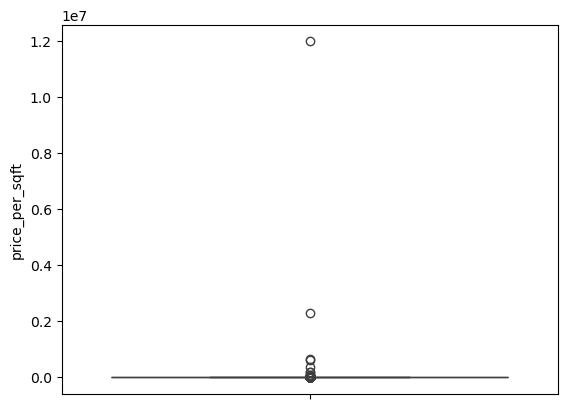

In [7]:
sns.boxplot(df['price_per_sqft'])


#### histogram  plot

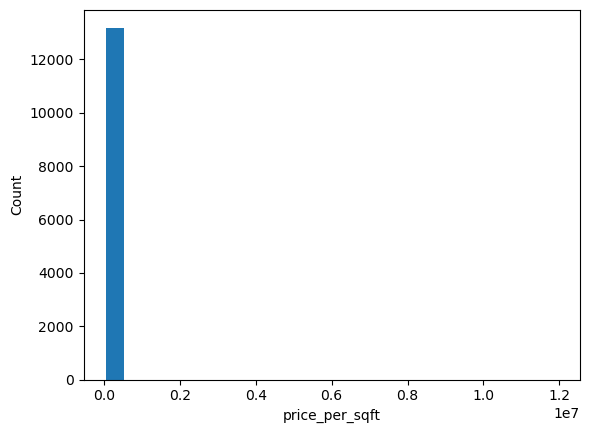

In [7]:
plt.hist(df['price_per_sqft'],bins=20,rwidth=0.8)
plt.xlabel('price_per_sqft')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='price_per_sqft', ylabel='Count'>

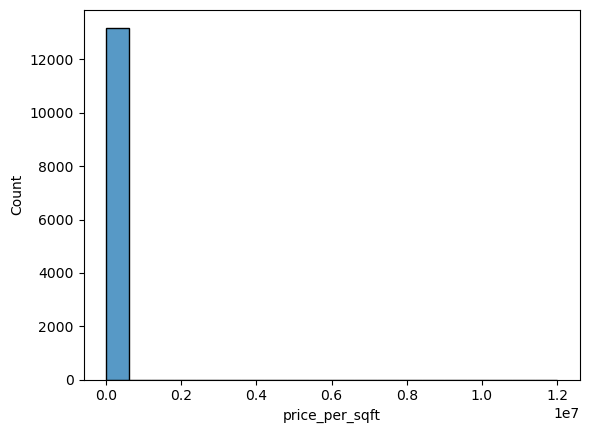

In [53]:
sns.histplot(df['price_per_sqft'],bins=20)

#### the minimum and maximum threshold using quantile

In [54]:
def detect_outliers(column):
    q1=df[column].quantile(0.25)
    q3=df[column].quantile(0.75)
    iqr=q3-q1
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
    return lower_bound,upper_bound

print(detect_outliers('price_per_sqft'))

(-308.0, 11892.0)


#### identify the number of outliers in the data set

In [34]:
q1=df['price_per_sqft'].quantile(0.25)
q3=df['price_per_sqft'].quantile(0.75)
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
df_outlier=df[(df['price_per_sqft']<lower_bound)|(df['price_per_sqft']>upper_bound)]
df_outlier.shape

(1265, 7)

#### generate a new DataFrame that has no outliers

In [55]:
df2=df[(df['price_per_sqft']>lower_bound)&(df['price_per_sqft']<upper_bound)]
df2.shape

(11935, 7)

In [56]:
# how many rows are outliers
df.shape[0]-df2.shape[0]

1265

In [24]:
df2['price_per_sqft'].describe()

count    11935.000000
mean      5575.925513
std       1957.779783
min        267.000000
25%       4166.000000
50%       5188.000000
75%       6603.000000
max      11875.000000
Name: price_per_sqft, dtype: float64

<Axes: ylabel='price_per_sqft'>

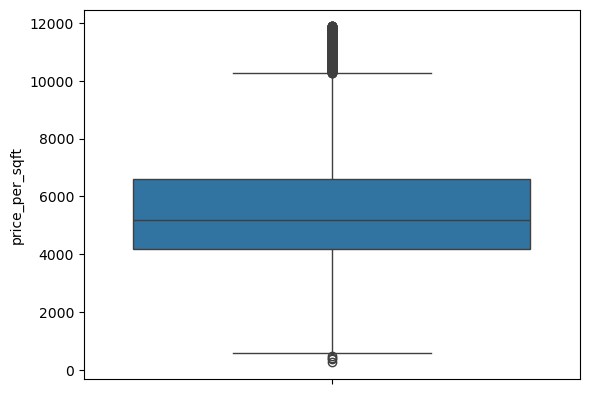

In [25]:
sns.boxplot(df2['price_per_sqft'])

<Axes: xlabel='price_per_sqft', ylabel='Count'>

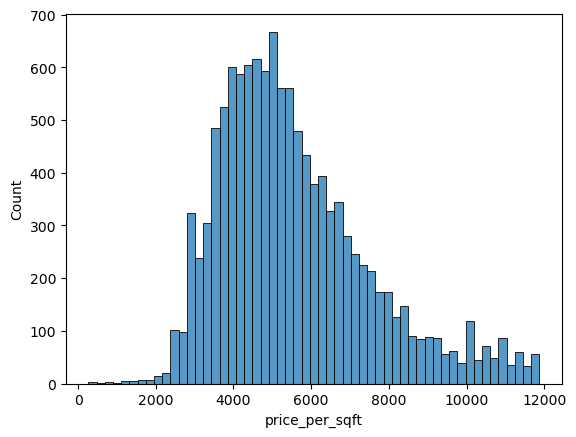

In [26]:
sns.histplot(df2['price_per_sqft'])

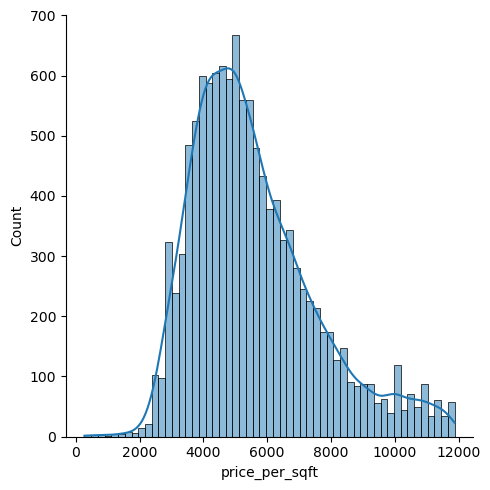

In [42]:
sns.displot(df2['price_per_sqft'],kde=True)

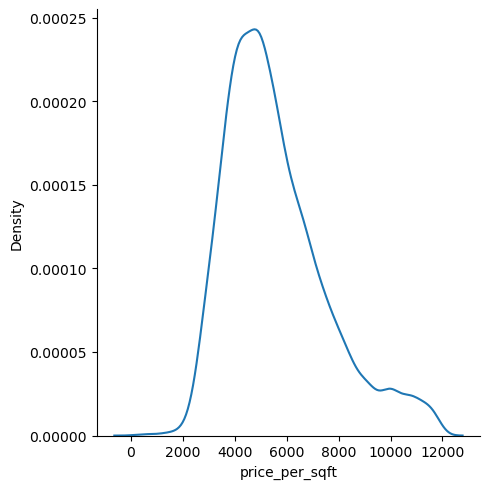

In [40]:
sns.displot(df2['price_per_sqft'],kind='kde')